### Problem Statement

You are a data scientist / AI engineer working on a breast cancer recurrence prediction project. You have been provided with a dataset named **`"breast_cancer_data.csv"`**, which includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).

Your task is to analyze this dataset to understand the factors contributing to breast cancer recurrence. You will handle class imbalance using various techniques and build machine learning models to predict whether a patient will experience recurrence events based on the provided features.

In [14]:
# # Dataset Credits

# Zwitter,Matjaz and Soklic,Milan. (1988). Breast Cancer. 
# UCI Machine Learning Repository. https://doi.org/10.24432/C51P4M.

**Import Necessary Libraries**

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot





### Task 1: Data Preparation and Exploration

1. Import the dataset and display the first few rows to understand its structure.
2. Check for any missing values in the dataset and handle them appropriately.
3. Visualize the class distribution to identify any class imbalance in the dataset.
4. Encoding categorical variables using one-hot encoding for the following columns: `age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat`.

In [3]:
# Step 1: Import the dataset and display the first few rows
df=pd.read_csv("breast_cancer_data.csv")
df.head(5)



,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [6]:
# Step 2: Check for any missing values in the dataset and handle them appropriately
df['node-caps'].fillna(df['node-caps'].mode()[0], inplace=True)
df.isnull().sum()




age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

<Axes: xlabel='class'>

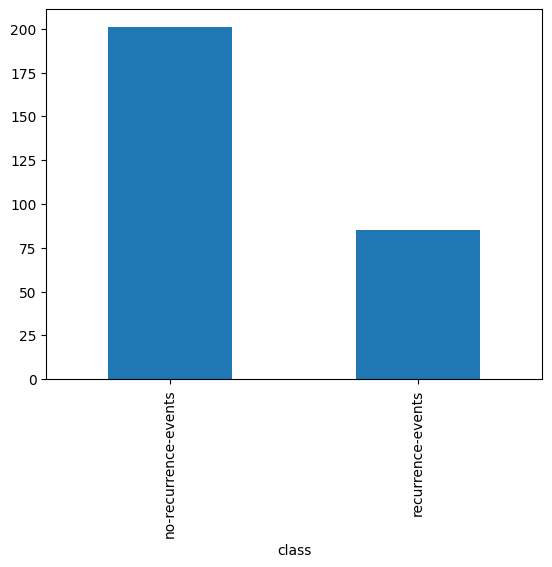

In [13]:
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset
df["class"].value_counts().plot(kind="bar")




In [14]:
# Step 4: Encoding categorical variables using one-hot encoding for the following columns:
# age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat.
categorical_cols = ['age', 'menopause', 'tumor-size', 'inv-nodes', 
                    'node-caps', 'breast', 'breast-quad', 'irradiat']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.head(5)



,deg-malig,class,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,...,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,3,no-recurrence-events,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,2,no-recurrence-events,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
2,2,no-recurrence-events,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False
3,2,no-recurrence-events,False,False,False,False,True,False,True,False,...,False,False,True,False,False,True,False,False,True,False
4,2,no-recurrence-events,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False


### Task 2: Logistic Regression Model Without Handling Class Imbalance

1. Split the dataset into training and test sets.
2. Train a Logistic Regression model using the training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [16]:
# Step 1: Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X = df_encoded.drop('class', axis=1)  
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)




In [18]:
# Step 2: Train a Logistic Regression model using the training data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7093023255813954

Classification Report:
                       precision    recall  f1-score   support

no-recurrence-events       0.75      0.88      0.81        60
   recurrence-events       0.53      0.31      0.39        26

            accuracy                           0.71        86
           macro avg       0.64      0.60      0.60        86
        weighted avg       0.68      0.71      0.68        86


Confusion Matrix:
 [[53  7]
 [18  8]]


### Task 3: Handling Class Imbalance Using Undersampling

1. Apply undersampling to balance the classes in the training data.
2. Train a Logistic Regression model using the undersampled training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [21]:
# Step 1: Apply undersampling to balance the classes in the training data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


In [31]:
# Step 2: Train a Logistic Regression model using the undersampled training data
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)



In [32]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.627906976744186

Classification Report:
                       precision    recall  f1-score   support

no-recurrence-events       0.78      0.65      0.71        60
   recurrence-events       0.42      0.58      0.48        26

            accuracy                           0.63        86
           macro avg       0.60      0.61      0.60        86
        weighted avg       0.67      0.63      0.64        86


Confusion Matrix:
 [[39 21]
 [11 15]]


### Task 4: Handling Class Imbalance Using SMOTE (Oversampling)

1. Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [33]:
# Step 1: Apply SMOTE to balance the classes in the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



# Step 2: Train a Logistic Regression model using the SMOTE-balanced training data
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)



# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.6976744186046512

Classification Report:
                       precision    recall  f1-score   support

no-recurrence-events       0.76      0.83      0.79        60
   recurrence-events       0.50      0.38      0.43        26

            accuracy                           0.70        86
           macro avg       0.63      0.61      0.61        86
        weighted avg       0.68      0.70      0.69        86


Confusion Matrix:
 [[50 10]
 [16 10]]


### Task 5: Handling Class Imbalance Using SMOTE Tomek Links

1. Apply SMOTE Tomek Links to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [34]:
# Step 1: Apply SMOTE Tomek Links to balance the classes in the training data
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)


# Step 2: Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data
model = LogisticRegression(max_iter=3000, random_state=42)
model.fit(X_train_smt, y_train_smt)
y_pred = model.predict(X_test)


# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6976744186046512

Classification Report:
                       precision    recall  f1-score   support

no-recurrence-events       0.76      0.83      0.79        60
   recurrence-events       0.50      0.38      0.43        26

            accuracy                           0.70        86
           macro avg       0.63      0.61      0.61        86
        weighted avg       0.68      0.70      0.69        86


Confusion Matrix:
 [[50 10]
 [16 10]]
